# The Sparks Foundation
## Data Science and Business Analytics
## Name: Suchi Panchal
### Task 6: Prediction using Decision Tree Algorithm

In [1]:
#import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [5]:
#load data

file = (r"C:\Users\HP\Downloads\Sparks Foundation\iris.csv")
data = pd.read_csv(file, sep = ',', header = 0)

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print("Dataset Length: ", len(data))
print("Dataset Shape: ", data.shape)

Dataset Length:  150
Dataset Shape:  (150, 6)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Spliting data into Training and Test sets

In [11]:
#Separating the target variable
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data.loc[:, feature_cols].values
#X = data.iloc[:,[1,2]].values
y=data.Species
#y = data.iloc[:,4].values
#y=y.astype('int')

#spliting data into "Test" and "Train"
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 0)

#### Perform feature scaling

In [12]:
#feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Fit the model in the Decision Tree classifier

In [13]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

#### Make predictions and check accuracy

In [14]:
#prediction
y_pred = classifier.predict(X_test)

#Accuracy
print('Accuracy Score:', accuracy_score(y_test,y_pred)*100)

Accuracy Score: 97.36842105263158


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

It means some of the observations have been classified as false

### Let us visualize the tree:

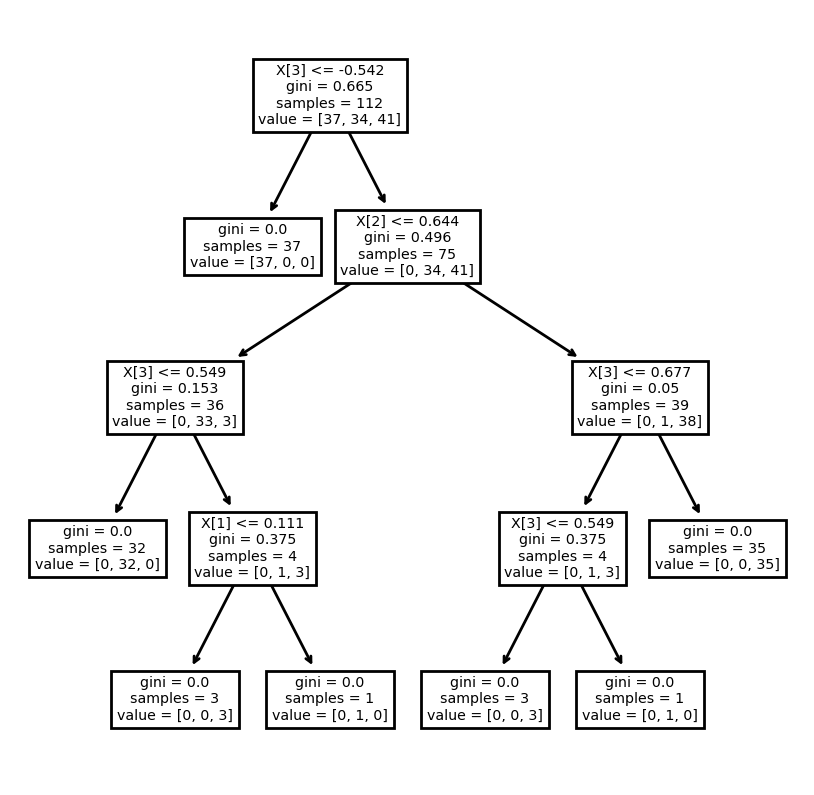

In [16]:
b = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)
tree.plot_tree(classifier);

### the code below tries to make the decision tree more interpretable by adding in feature and class names 

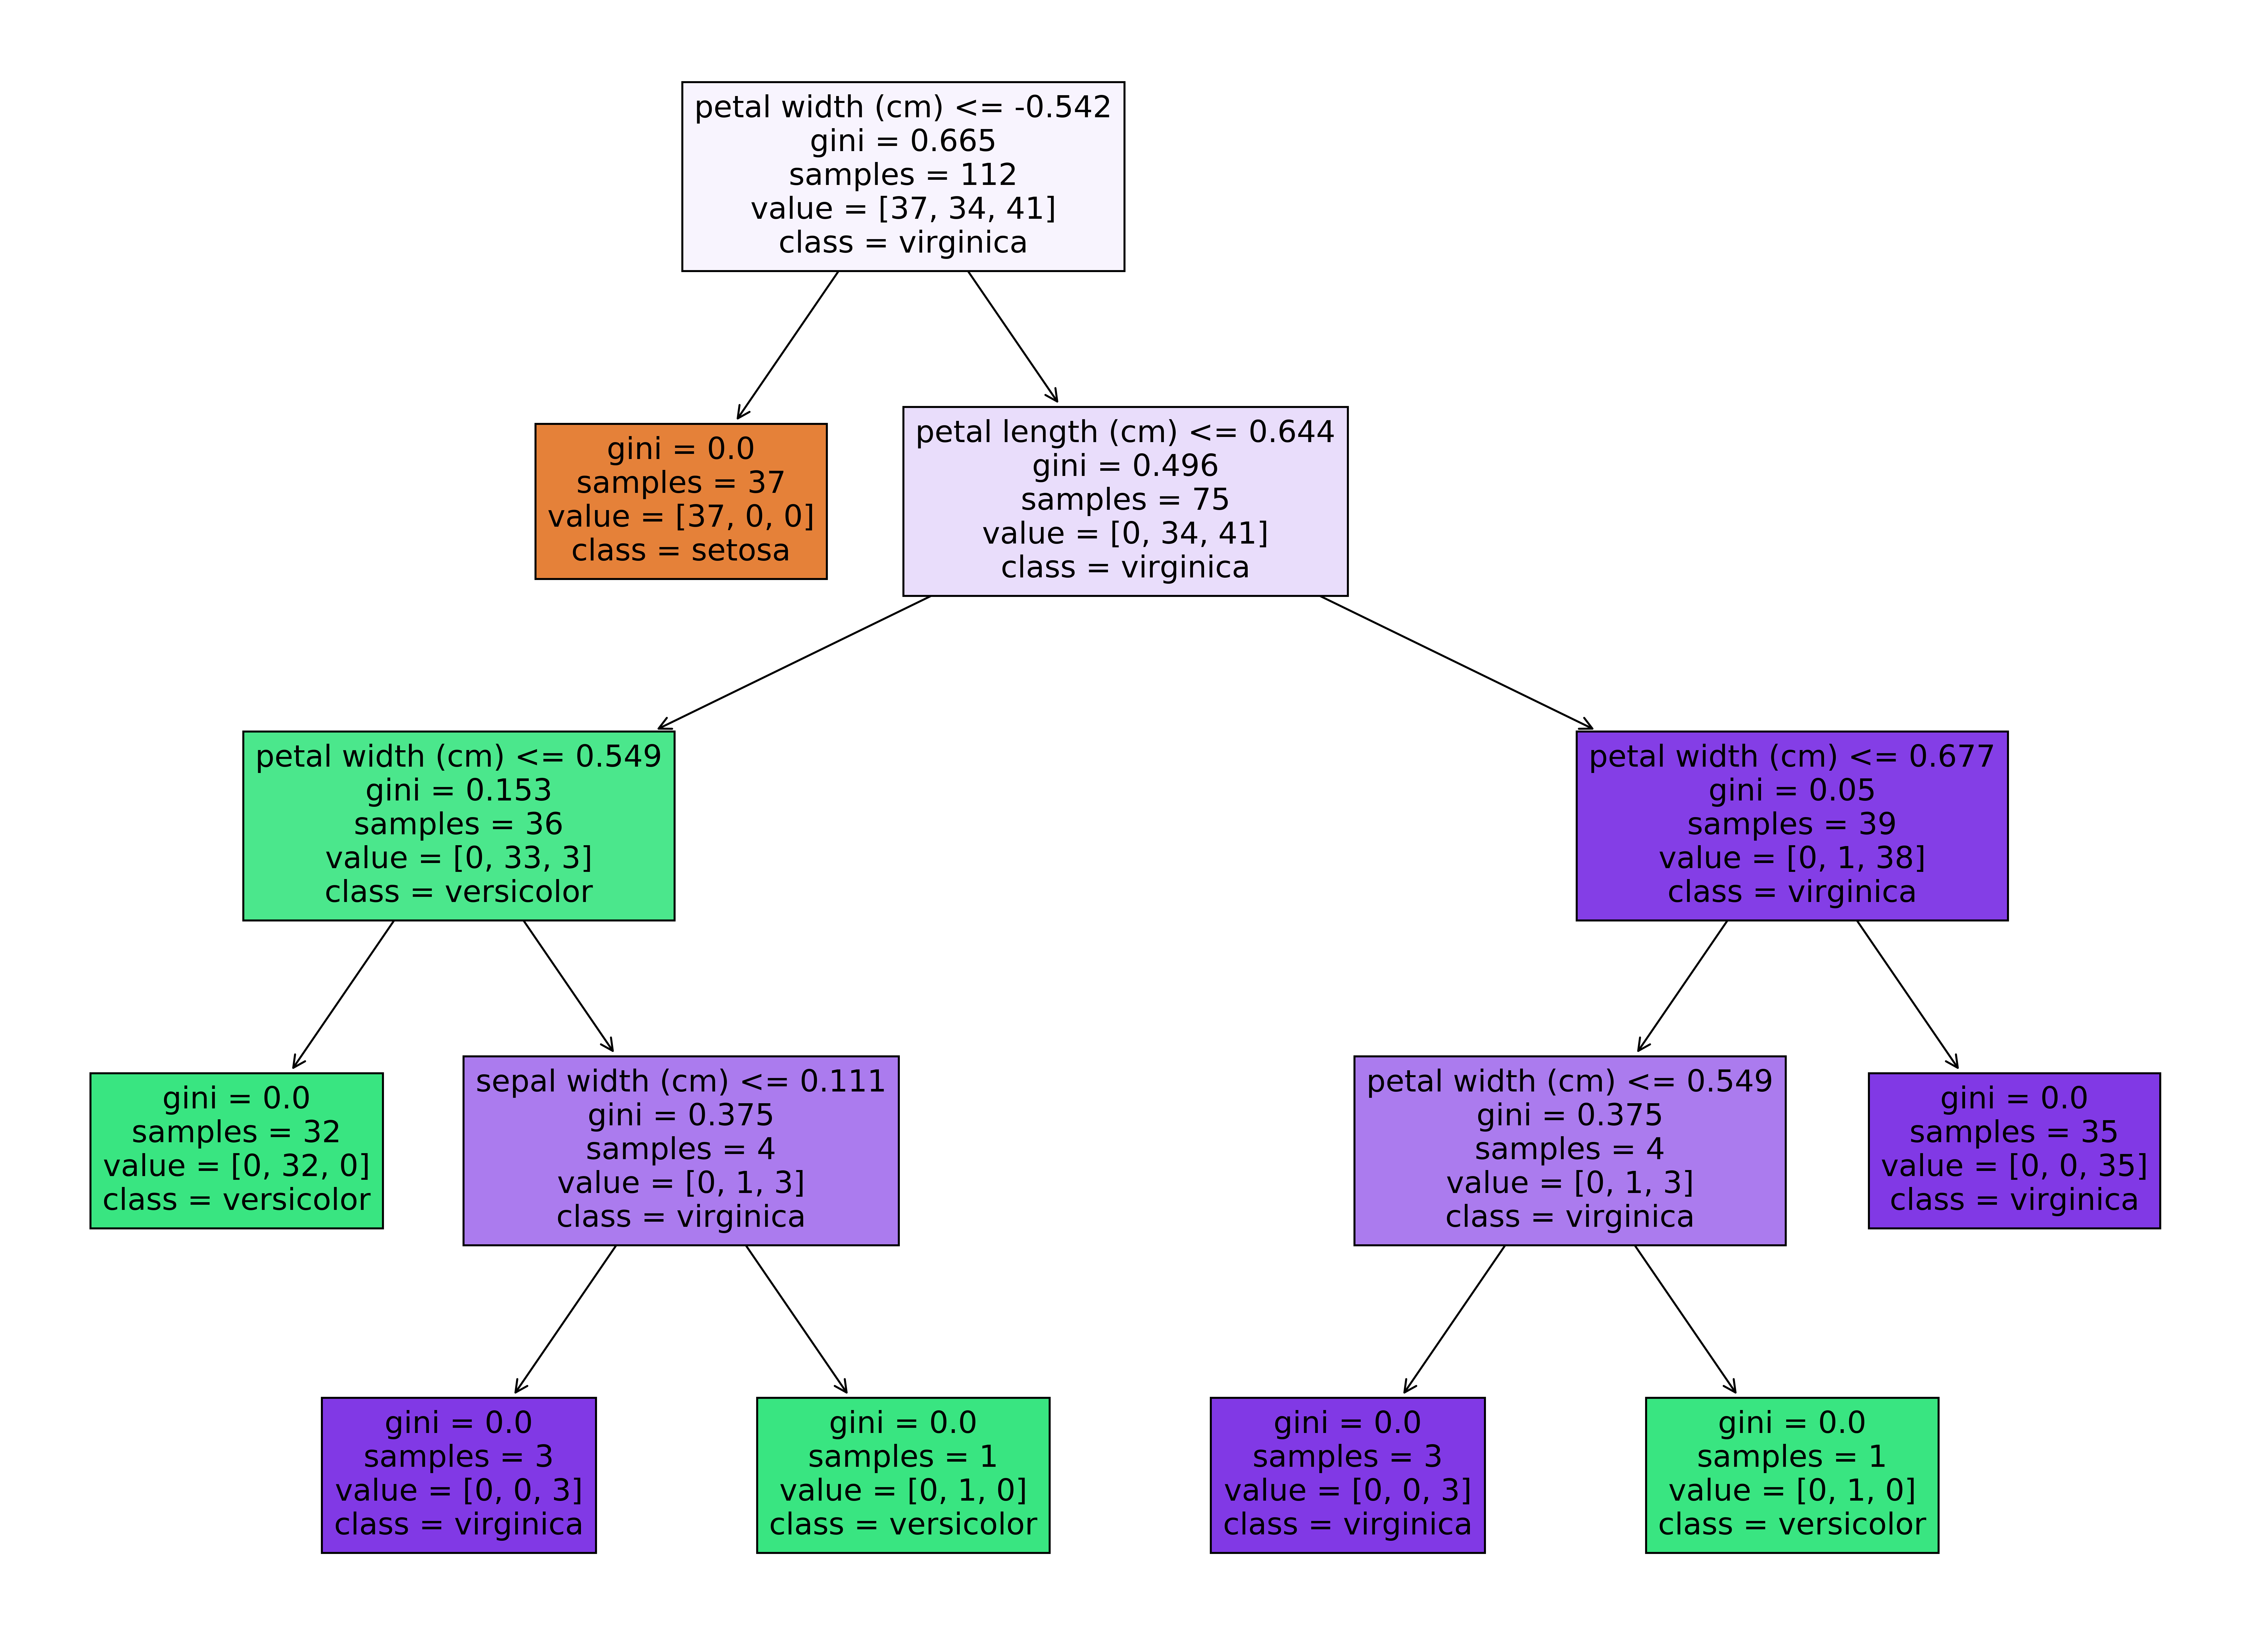

In [17]:
fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,15), dpi=500)
tree.plot_tree(classifier, feature_names = fn, class_names=cn, filled = True);
fig.savefig('imagename.png')

We can also Visualize the tree using graphviz package, which can be easily installed by using the pip commamd "pip install graphviz".

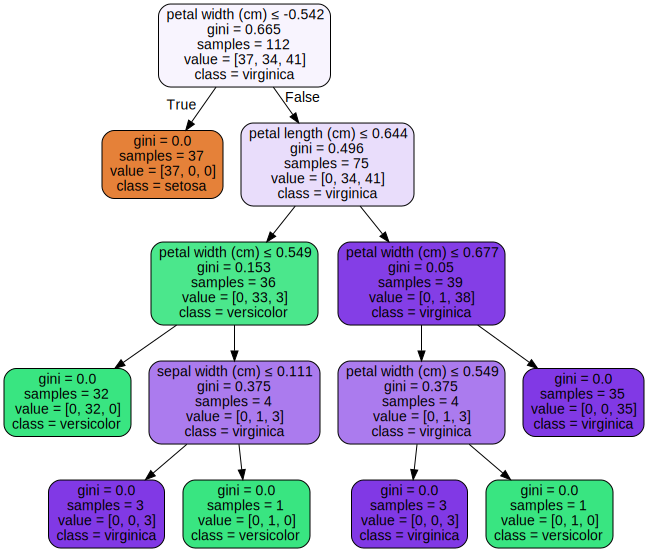

In [20]:
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = fn, class_names=cn, filled = True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)  
graph 